In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm

#Load the dataset
df = pd.read_csv('C:\\Users\\aryan\\Downloads\\NFLX.csv')

#Display the first few rows of the dataframe
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [3]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


In [3]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

       

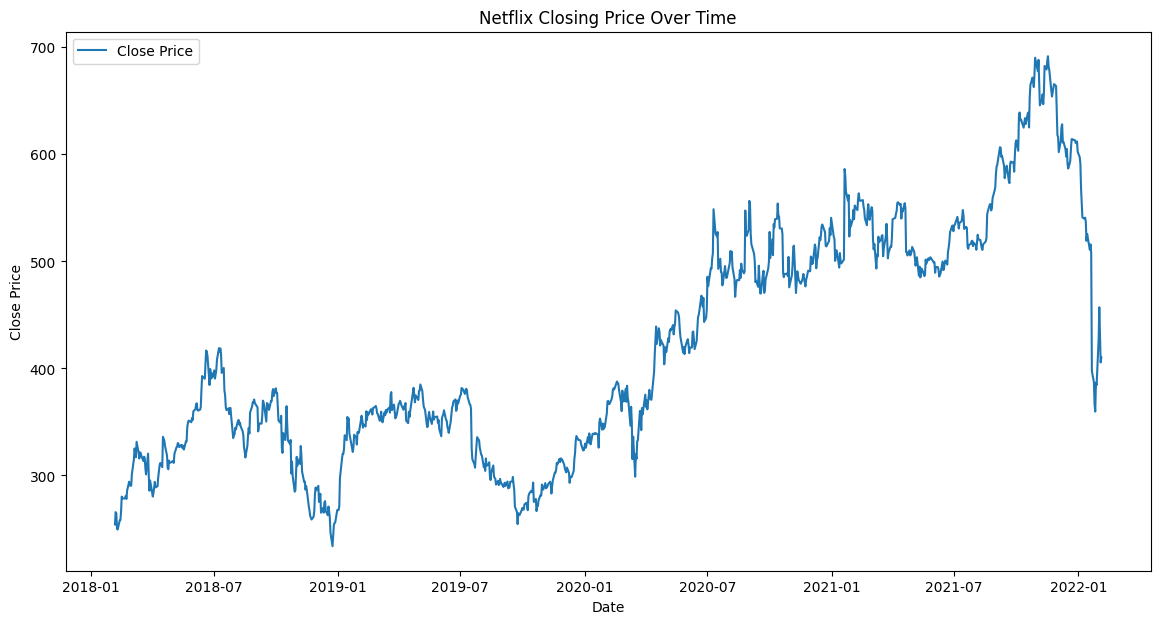

In [5]:
# Convent the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(14, 7), facecolor='white') 
plt.plot(df['Close'], label='Close Price')
plt.title('Netflix Closing Price Over Time') 
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

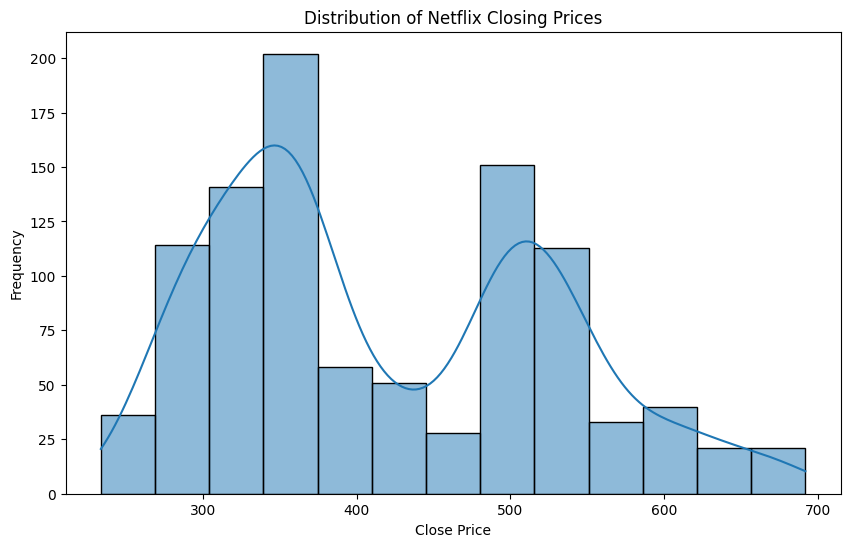

In [6]:
# Plot the distribution of closing prices
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(df['Close'],kde=True)
plt.title('Distribution of Netflix Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

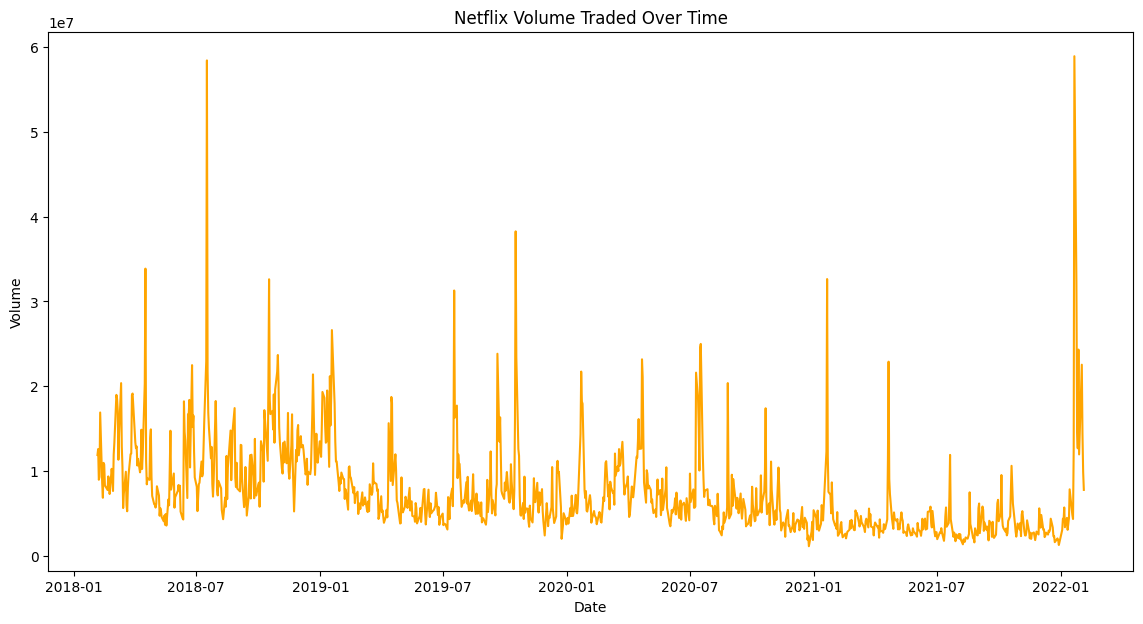

In [7]:
# Plot the volume traded over time
plt.figure(figsize=(14, 7), facecolor='white')
plt.plot(df['Volume'], label='Volume Traded', color='orange')
plt.title('Netflix Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' price column for prediction
close_prices = df['Close'].values

# Reshape the data to fit the scaler
close_prices = close_prices.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_size = int(len(scaled_close_prices) * 0.8)
test_size = len(scaled_close_prices) - train_size
train_data, test_data = scaled_close_prices[0:train_size, :], scaled_close_prices[train_size:len(scaled_close_prices), :]
print('Training data shape:', train_data.shape)
print('Testing data shape:', test_data.shape)

Training data shape: (807, 1)
Testing data shape: (202, 1)


In [7]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i + time_step), 0]
        dataX.append (a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
    
# Set the time step
time_step = 100

# Create the training and testing datasets
X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

# Reshape the input to be [samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('X_train shape:', X_train.shape) 
print('y_test shape:', y_train.shape)
print('X_train shape:', X_test.shape) 
print('y_train shape:', y_test.shape) 

X_train shape: (706, 100, 1)
y_test shape: (706,)
X_train shape: (101, 100, 1)
y_train shape: (101,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True)) 
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

print('Model training complete.')

706/706 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - loss: 0.0052
Model training complete.
